# Tugas Akhir (Decision Tree, KNN, Naive Bayes, BNN)

**Nama  : Rizki Ardian Samudra**

**NIM   : 210411100179**

**Kelas : Penambangan Data-C**

Dataset Anemia ini berisi atribut Gender (Jenis Kelamin), Hemoglobin, MCHC, MCV, MCH, dan Results (Hasil). Dataset ini digunakan untuk memprediksi apakah seorang pasien berpotensi menderita anemia.

Jenis Kelamin: 0 - laki-laki, 1 - perempuan

Hemoglobin: Hemoglobin adalah protein dalam sel darah merah yang membawa oksigen ke organ dan jaringan tubuh Anda serta mengangkut karbon dioksida dari organ dan jaringan tubuh Anda kembali ke paru-paru.

MCH: MCH singkatan dari "mean corpuscular hemoglobin" (rata-rata jumlah hemoglobin di setiap sel darah merah). Hemoglobin ini membawa oksigen di sekitar tubuh Anda.

MCHC: MCHC singkatan dari mean corpuscular hemoglobin concentration (konsentrasi rata-rata hemoglobin dalam satu sel darah merah). Ini adalah ukuran konsentrasi rata-rata hemoglobin dalam satu sel darah merah.

MCV: MCV singkatan dari mean corpuscular volume (volume rata-rata korpuskular merah). Tes darah MCV mengukur ukuran rata-rata sel darah merah Anda.

Results: 0- tidak anemia, 1- anemia

Mengimport library yang diperlukan

In [164]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Mengimport data kita

In [165]:
df = pd.read_csv('https://gist.githubusercontent.com/rizkiardian/1b0b56e5335a1f71da098adc4ba605a1/raw/2c4fdd4f65ef3bb745f6918b8e7c6c6462b77060/anemia.csv')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


Mengubah fitur gender dan label result sesuai data asli

In [166]:
# Mengubah nilai pada kolom Gender
df['Gender'] = df['Gender'].map({0: 'Laki-laki', 1: 'Perempuan'})

# Mengubah nilai pada kolom Results
df['Result'] = df['Result'].map({0: 'Tidak Anemia', 1: 'Anemia'})

# Menampilkan DataFrame hasil perubahan
df.head(jumlah_baris)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Perempuan,14.9,22.7,29.1,83.7,Tidak Anemia
1,Laki-laki,15.9,25.4,28.3,72.0,Tidak Anemia
2,Laki-laki,9.0,21.5,29.6,71.2,Anemia
3,Laki-laki,14.9,16.0,31.4,87.5,Tidak Anemia
4,Perempuan,14.7,22.0,28.2,99.5,Tidak Anemia
...,...,...,...,...,...,...
1416,Laki-laki,10.6,25.4,28.2,82.9,Anemia
1417,Perempuan,12.1,28.3,30.4,86.9,Anemia
1418,Perempuan,13.1,17.7,28.1,80.7,Anemia
1419,Laki-laki,14.3,16.2,29.5,95.2,Tidak Anemia


Mengecek nilai yang hilang/kosong pada data

In [167]:
df = df.copy()
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Mengganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [168]:
df = df.replace('?',np.nan)

Mengecek lagi apakah ada nilai yang kosong pada data

In [169]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik maka perlu diubah type datanya

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   object 
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   object 
dtypes: float64(4), object(2)
memory usage: 66.7+ KB


Menghitung jumlah target pada dataset

In [171]:
# Menghitung jumlah target
jumlah_target = df['Result'].value_counts()

# Menampilkan hasil
print(jumlah_target)

Tidak Anemia    801
Anemia          620
Name: Result, dtype: int64


Melakukan Normalisasi Data

In [172]:
# Mengambil kolom-kolom yang diinginkan
data = df.copy()
selected_data = data[['Gender',	'Hemoglobin',	'MCH',	'MCHC',	'MCV', 'Result']]

# Melakukan normalisasi Min-Max Scaling pada kolom numerik
numeric_data = selected_data[['Hemoglobin',	'MCH',	'MCHC',	'MCV']]
minmax = MinMaxScaler()
normalized_numeric = minmax.fit_transform(numeric_data)

# Mengubah kolom categorical menjadi angka menggunakan LabelEncoder
categorical_data = selected_data[['Gender', 'Result']]
# Data gender
label_encoder_gender = LabelEncoder()
encoded_gender = label_encoder_gender.fit_transform(categorical_data['Gender'])
# Data result
label_encoder_result = LabelEncoder()
encoded_result = label_encoder_result.fit_transform(categorical_data['Result'])

# Menggabungkan kembali data yang telah dinormalisasi
normalized_data = pd.DataFrame(
    {
        'Gender': encoded_gender,
        'Hemoglobin': normalized_numeric[:, 0],
        'MCH': normalized_numeric[:, 1],
        'MCHC': normalized_numeric[:, 2],
        'MCV': normalized_numeric[:, 3],
        'Result': encoded_result,
    }
)

normalized_data.head(jumlah_baris)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,0.805825,0.478571,0.276596,0.444099,1
1,0,0.902913,0.671429,0.106383,0.080745,1
2,0,0.233010,0.392857,0.382979,0.055901,0
3,0,0.805825,0.000000,0.765957,0.562112,1
4,1,0.786408,0.428571,0.085106,0.934783,1
...,...,...,...,...,...,...
1416,0,0.388350,0.671429,0.085106,0.419255,0
1417,1,0.533981,0.878571,0.553191,0.543478,0
1418,1,0.631068,0.121429,0.063830,0.350932,0
1419,0,0.747573,0.014286,0.361702,0.801242,1


Menyimpan data normalisasi

In [173]:
with open('minmax.pkl', 'wb') as file:
    pickle.dump(minmax, file)

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('label_encoder_result.pkl', 'wb') as file:
    pickle.dump(label_encoder_result, file)

Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [174]:
# Memisahkan fitur dan target
X = normalized_data[['Gender',	'Hemoglobin',	'MCH',	'MCHC',	'MCV']].copy()
y = normalized_data['Result'].copy()

In [175]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 1. Decision Tree

Import library Decision Tree

In [176]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Membuat model Decision Tree dengan metode impurity criterion Gini

In [177]:
# membuat klasifikasi Decision Tree dengan kedalaman maksimum 3 dan kriteria pemisahan (splitting) Gini impurity.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# membuat model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Menampilkan visualisasi decision tree dalam bentuk grafik yang berisi informasi seperti fitur yang digunakan, nilai ambang yang digunakan dalam setiap node, dan label kelas yang dihasilkan oleh model.

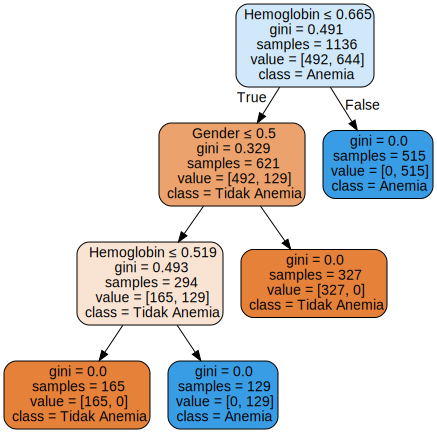

In [178]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X.columns,  
                              class_names=df['Result'].unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Menghitung akurasi model Decision Tree

In [179]:
# menghitung akurasi pada data testing
y_pred_gini = clf_gini.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_gini)
print('Accuracy Decision Tree: {:.2f}'.format(accuracy_dt))

Accuracy Decision Tree: 1.00


## 2. KNN

Import library KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier

Membuat model KNN

In [181]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=3)

Melatih model KNN

In [182]:
# Melatih model dengan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Menghitung akurasi model KNN

In [183]:
# Memprediksi kelas target untuk data uji
y_pred_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy KNN: {:.2f}'.format(accuracy_knn))

Accuracy KNN: 0.98


## 3. Naive Bayes

Import library Naive Bayes

In [184]:
from sklearn.naive_bayes import GaussianNB

Melakukan klasifikasi dengan metode Naive Bayes

In [185]:
# Membangun model Naive Bayes
clf_gaussian = GaussianNB()

Melatih model Naive Bayes

In [186]:
clf_gaussian.fit(X_train, y_train)

GaussianNB()

Menghitung akurasi model Naive Bayes

In [187]:
# Melakukan prediksi target menggunakan model Gaussian Naive Bayes yang telah dilatih
y_pred_gaussian = clf_gaussian.predict(X_test)

# Menghitung akurasi prediksi
accuracy_nb = accuracy_score(y_test, y_pred_gaussian)
print('Accuracy Naive Bayes: {:.2f}'.format(accuracy_nb))

Accuracy Naive Bayes: 0.95


## 4. Backpropagation Neural Network

Import library Backpropagation Neural Network

In [188]:
from sklearn.neural_network import MLPClassifier

Melakukan klasifikasi dengan metode BNN

In [189]:
mlp_clf = MLPClassifier(random_state=42, hidden_layer_sizes=(150,100,50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'adam', alpha=0.0001)

Melatih model BNN

In [190]:
# melakukan training pada model 
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=300, random_state=42)

Menghitung akurasi model BNN

In [191]:
y_pred_mlp = mlp_clf.predict(X_test)
accuracy_bnn = accuracy_score(y_test, y_pred_mlp)
print('Accuracy BNN: {:.2f}'.format(accuracy_bnn))

Accuracy BNN: 1.00


### Menampilkan visualisasi model mana yang terbaik untuk diterapkan

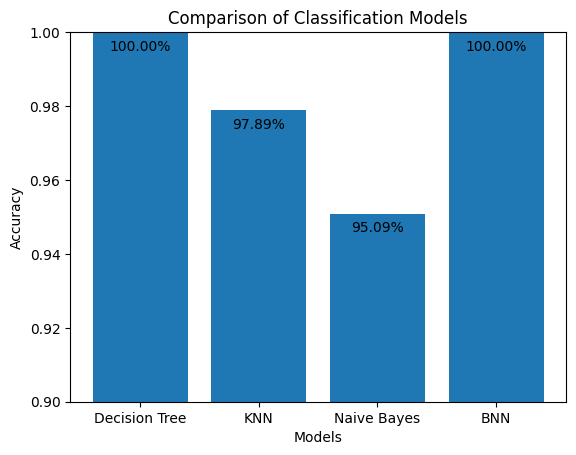

In [192]:
# Membuat visualisasi perbandingan
models = ['Decision Tree', 'KNN', 'Naive Bayes', 'BNN']
accuracies = [accuracy_dt, accuracy_knn, accuracy_nb, accuracy_bnn]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')
plt.ylim(0.9, 1.0)

# Menambahkan teks persentase di bagian bawah batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 0.005, f'{acc*100:.2f}%', ha='center')
    
plt.show()

Menyimpan model terbaik dari model-model diatas

In [193]:
# model Decision Tree yang terbaik
with open('clf_gini.pkl', 'wb') as file:
    pickle.dump(clf_gini, file)

Meload semua Preprocessing dan Model yang telah kita simpan

In [194]:
# Preprocessing
with open('minmax.pkl', 'rb') as file:
    minmax_load = pickle.load(file)

with open('label_encoder_result.pkl', 'rb') as file:
    label_encoder_result_load = pickle.load(file)

with open('label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender_load = pickle.load(file)

# Model
with open('clf_gini.pkl', 'rb') as file:
    clf_gini_load = pickle.load(file)

Mencoba memprediksi dari model terbaik yang telah kita pilih

In [195]:
new_data = pd.DataFrame({
    'Gender': ['Laki-laki'],
    'Hemoglobin': [14.3],
    'MCH': [16.2],
    'MCHC': [29.5],
    'MCV': [95.2]
})

# Melakukan normalisasi Min-Max Scaling pada kolom numerik
normalisasi_numerik = minmax_load.transform(new_data[['Hemoglobin', 'MCH', 'MCHC', 'MCV']])

# Melakukan normalisasi label encoder pada kolom kategorik
normalisasi_kategorik = label_encoder_gender_load.transform(new_data['Gender'])

# Menggabungkan kembali data yang telah dinormalisasi
normalized_new_data = pd.DataFrame(
    {
        'Gender': normalisasi_kategorik,
        'Hemoglobin': normalisasi_numerik[:, 0],
        'MCH': normalisasi_numerik[:, 1],
        'MCHC': normalisasi_numerik[:, 2],
        'MCV': normalisasi_numerik[:, 3]
    }
)

# Memprediksi dari model Decision Tree
predicted_result = clf_gini_load.predict(normalized_new_data)

# Mengubah hasil prediksi kembali menjadi label asli menggunakan inverse_transform pada LabelEncoder
predicted_result = label_encoder_result_load.inverse_transform(predicted_result)

print('Predicted Result:', predicted_result)

Predicted Result: ['Tidak Anemia']
